In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
sns.set(rc={'figure.figsize':(15,9)})

In [194]:
# Import data
stem_occ = pd.read_excel('stem_emp_earnings_2015_2020.xlsx')
stem_enrol = pd.read_excel('Stem_enrolments_2015_2020.xlsx')

In [195]:
# Check table
stem_enrol.head()

Unnamed: 0               STEM Enrolments 2015-2020  Unnamed: 2  \
0       Year                                 Subject  Male Total   
1       2015                 Science and Engineering    13267877   
2       2015  Science and Engineering Related Fields     1679197   
3       2016                 Science and Engineering    13605954   
4       2016  Science and Engineering Related Fields     1730758   

     Unnamed: 3    Unnamed: 4      Unnamed: 5  
0  Male Percent  Female Total  Female Percent  
1         0.438       8562219           0.262  
2         0.055       4081892           0.125  
3         0.438       8871392           0.263  
4         0.056       4258518           0.126

In [196]:
# Rename columns
stem_enrol = stem_enrol.rename(columns={"Unnamed: 0": "Year", "STEM Enrolments 2015-2020": "Subject",
                                      "Unnamed: 2": "Male Total", "Unnamed: 3": "Male Percent", 
                                        "Unnamed: 4": "Female Total","Unnamed: 5": "Female Percent" })

In [197]:
# Drop row 0 as it duplicates column names

stem_enrol = stem_enrol.drop([0], axis=0)

In [118]:
stem_enrol.dtypes

Year              object
Subject           object
Male Total        object
Male Percent      object
Female Total      object
Female Percent    object
dtype: object

In [198]:
# Covert year column to datetime

stem_enrol['Year'] = pd.to_datetime(stem_enrol['Year']).dt.year

In [177]:
stem_occ.head()

Year                                   STEM occupations    Total  \
0  2015      Computer, engineering, and science occupat...  7891250   
1  2015              Computer and mathematical occupations  3950741   
2  2015           Architecture and engineering occupations  2660852   
3  2015          Life, physical, and social science occ...  1279657   
4  2016      Computer, engineering, and science occupat...  8133920   

   Male total  Male total percent  Female total  Female total percent  \
0     5870218               0.744       2021032                 0.256   
1     2914444               0.738       1036297                 0.262   
2     2266481               0.852        394371                 0.148   
3      689293               0.539        590364                 0.461   
4     6054197               0.744       2079723                 0.256   

   Median earnings  Male Median Earnings  Female Median Earnings  \
0            76583                 80288                   66878   
1            78748                 81644                   70816   
2            78575                 80565                   67675   
3            63563                 68518                   59010   
4            77718                 81219                   67842   

   Womens earnings as percentage of mens  
0                                  0.833  
1                                  0.867  
2                                  0.840  
3                                  0.861  
4                                  0.835

In [178]:
stem_occ.dtypes

Year                                       int64
STEM occupations                          object
Total                                      int64
Male total                                 int64
Male total percent                       float64
Female total                               int64
Female total percent                     float64
Median earnings                            int64
Male Median Earnings                       int64
Female Median Earnings                     int64
Womens earnings as percentage of mens    float64
dtype: object

In [179]:
# Rename columns
stem_occ = stem_occ.rename(columns={"STEM occupations": "STEM_occupations"})

In [180]:
stem_occ['STEM_occupations']= stem_occ.STEM_occupations.str.replace('Computer, engineering, and science occupations:','All Stem',regex = True)

In [181]:
stem_occ

Year                                   STEM_occupations    Total  \
0   2015                                           All Stem  7891250   
1   2015              Computer and mathematical occupations  3950741   
2   2015           Architecture and engineering occupations  2660852   
3   2015          Life, physical, and social science occ...  1279657   
4   2016                                           All Stem  8133920   
5   2016              Computer and mathematical occupations  4130533   
6   2016           Architecture and engineering occupations  2707634   
7   2016          Life, physical, and social science occ...  1295753   
8   2017                                           All Stem  8427417   
9   2017              Computer and mathematical occupations  4337289   
10  2017           Architecture and engineering occupations  2768696   
11  2017          Life, physical, and social science occ...  1321432   
12  2018                                           All Stem  8872203   
13  2018              Computer and mathematical occupations  4633860   
14  2018           Architecture and engineering occupations  2822111   
15  2018          Life, physical, and social science occ...  1416232   
16  2019                                           All Stem  9268526   
17  2019              Computer and mathematical occupations  4841319   
18  2019           Architecture and engineering occupations  2946562   
19  2019          Life, physical, and social science occ...  1480645   
20  2020                                           All Stem  9710570   
21  2020              Computer and mathematical occupations  5072830   
22  2020           Architecture and engineering occupations  3088608   
23  2020          Life, physical, and social science occ...  1549132   

    Male total  Male total percent  Female total  Female total percent  \
0      5870218               0.744       2021032                 0.256   
1      2914444               0.738       1036297                 0.262   
2      2266481               0.852        394371                 0.148   
3       689293               0.539        590364                 0.461   
4      6054197               0.744       2079723                 0.256   
5      3059032               0.741       1071501                 0.259   
6      2301227               0.850        406407                 0.150   
7       693938               0.536        601815                 0.464   
8      6269697               0.744       2157720                 0.256   
9      3220664               0.743       1116625                 0.257   
10     2345780               0.847        422916                 0.153   
11      703253               0.532        618179                 0.468   
12     6570508               0.741       2301695                 0.259   
13     3426408               0.739       1207452                 0.261   
14     2385386               0.845        436725                 0.155   
15      758714               0.536        657518                 0.464   
16     6848123               0.739       2420403                 0.261   
17     3577083               0.739       1264236                 0.261   
18     2486105               0.844        460457                 0.156   
19      784935               0.530        695710                 0.470   
20     7153628               0.737       2556942                 0.263   
21     3746788               0.739       1326042                 0.261   
22     2594744               0.840        493864                 0.160   
23      812096               0.524        737036                 0.476   

    Median earnings  Male Median Earnings  Female Median Earnings  \
0             76583                 80288                   66878   
1             78748                 81644                   70816   
2             78575                 80565                   67675   
3             63563                 68518                   59010   
4      

In [ ]:
# Covert year column to datetime

#stem_occ['Year'] = pd.to_datetime(stem_enrol['Year'])

In [182]:
all_stem_occ = stem_occ[stem_occ['STEM_occupations'].str.contains("All Stem")]

In [183]:
all_stem_occ

Year STEM_occupations    Total  Male total  Male total percent  \
0   2015         All Stem  7891250     5870218               0.744   
4   2016         All Stem  8133920     6054197               0.744   
8   2017         All Stem  8427417     6269697               0.744   
12  2018         All Stem  8872203     6570508               0.741   
16  2019         All Stem  9268526     6848123               0.739   
20  2020         All Stem  9710570     7153628               0.737   

    Female total  Female total percent  Median earnings  Male Median Earnings  \
0        2021032                 0.256            76583                 80288   
4        2079723                 0.256            77718                 81219   
8        2157720                 0.256            80100                 83393   
12       2301695                 0.259            81890                 84916   
16       2420403                 0.261            84021                 87334   
20       2556942                 0.263            85309                 89176   

    Female Median Earnings  Womens earnings as percentage of mens  
0                    66878                                  0.833  
4                    67842                                  0.835  
8                    70177                                  0.842  
12                   71530                                  0.842  
16                   73660                                  0.843  
20                   75143                                  0.843

In [130]:
stem_occ.columns

Index(['Year', 'STEM_occupations', 'Total', 'Male total', 'Male total percent',
       'Female total', 'Female total percent', 'Median earnings',
       'Male Median Earnings', 'Female Median Earnings',
       'Womens earnings as percentage of mens'],
      dtype='object')

In [131]:
stem_enrol.columns

Index(['Year', 'Subject', 'Male Total', 'Male Percent', 'Female Total',
       'Female Percent'],
      dtype='object')

In [184]:
stem_enrol

Year                                 Subject Male Total Male Percent  \
1   2015                 Science and Engineering   13267877        0.438   
2   2015  Science and Engineering Related Fields    1679197        0.055   
3   2016                 Science and Engineering   13605954        0.438   
4   2016  Science and Engineering Related Fields    1730758        0.056   
5   2017                 Science and Engineering   14024494        0.439   
6   2017  Science and Engineering Related Fields    1797426        0.056   
7   2018                 Science and Engineering   14440302         0.44   
8   2018  Science and Engineering Related Fields    1849503        0.056   
9   2019                 Science and Engineering   14846326        0.441   
10  2019  Science and Engineering Related Fields    1913361        0.057   
11  2020                 Science and Engineering   15307579        0.441   
12  2020  Science and Engineering Related Fields    1987903        0.057   

   Female Total Female Percent  
1       8562219          0.262  
2       4081892          0.125  
3       8871392          0.263  
4       4258518          0.126  
5       9273481          0.266  
6       4452275          0.128  
7       9637921          0.267  
8       4657264          0.129  
9      10052918           0.27  
10      4868815          0.131  
11     10535634          0.272  
12      5102639          0.132

Year                                 Subject Male Total Male Percent  \
1   2015                 Science and Engineering   13267877        0.438   
2   2015  Science and Engineering Related Fields    1679197        0.055   
3   2016                 Science and Engineering   13605954        0.438   
4   2016  Science and Engineering Related Fields    1730758        0.056   
5   2017                 Science and Engineering   14024494        0.439   
6   2017  Science and Engineering Related Fields    1797426        0.056   
7   2018                 Science and Engineering   14440302         0.44   
8   2018  Science and Engineering Related Fields    1849503        0.056   
9   2019                 Science and Engineering   14846326        0.441   
10  2019  Science and Engineering Related Fields    1913361        0.057   
11  2020                 Science and Engineering   15307579        0.441   
12  2020  Science and Engineering Related Fields    1987903        0.057   

   Female Total Female Percent  
1       8562219          0.262  
2       4081892          0.125  
3       8871392          0.263  
4       4258518          0.126  
5       9273481          0.266  
6       4452275          0.128  
7       9637921          0.267  
8       4657264          0.129  
9      10052918           0.27  
10      4868815          0.131  
11     10535634          0.272  
12      5102639          0.132

In [201]:
# Change value name
stem_enrol['Subject']= stem_enrol.Subject.str.replace('Science and Engineering','STEM Subjects',regex = True)

#stem_enrol = stem_enrol['Subject']= stem_enrol.Subject.str.replace('Science and Engineering Related Fields','STEM Related',regex = True)

In [202]:
stem_enrol

Year                       Subject Male Total Male Percent Female Total  \
1   2015                 STEM Subjects   13267877        0.438      8562219   
2   2015  STEM Subjects Related Fields    1679197        0.055      4081892   
3   2016                 STEM Subjects   13605954        0.438      8871392   
4   2016  STEM Subjects Related Fields    1730758        0.056      4258518   
5   2017                 STEM Subjects   14024494        0.439      9273481   
6   2017  STEM Subjects Related Fields    1797426        0.056      4452275   
7   2018                 STEM Subjects   14440302         0.44      9637921   
8   2018  STEM Subjects Related Fields    1849503        0.056      4657264   
9   2019                 STEM Subjects   14846326        0.441     10052918   
10  2019  STEM Subjects Related Fields    1913361        0.057      4868815   
11  2020                 STEM Subjects   15307579        0.441     10535634   
12  2020  STEM Subjects Related Fields    1987903        0.057      5102639   

   Female Percent  
1           0.262  
2           0.125  
3           0.263  
4           0.126  
5           0.266  
6           0.128  
7           0.267  
8           0.129  
9            0.27  
10          0.131  
11          0.272  
12          0.132

In [163]:
stem_en_2 = stem_enrol[stem_enrol['Subject'].str.contains("Stem Subjects")]

In [164]:
stem_en_2

Year                       Subject Male Total Male Percent Female Total  \
1   2015                 Stem Subjects   13267877        0.438      8562219   
2   2015  Stem Subjects Related Fields    1679197        0.055      4081892   
3   2016                 Stem Subjects   13605954        0.438      8871392   
4   2016  Stem Subjects Related Fields    1730758        0.056      4258518   
5   2017                 Stem Subjects   14024494        0.439      9273481   
6   2017  Stem Subjects Related Fields    1797426        0.056      4452275   
7   2018                 Stem Subjects   14440302         0.44      9637921   
8   2018  Stem Subjects Related Fields    1849503        0.056      4657264   
9   2019                 Stem Subjects   14846326        0.441     10052918   
10  2019  Stem Subjects Related Fields    1913361        0.057      4868815   
11  2020                 Stem Subjects   15307579        0.441     10535634   
12  2020  Stem Subjects Related Fields    1987903        0.057      5102639   

   Female Percent  
1           0.262  
2           0.125  
3           0.263  
4           0.126  
5           0.266  
6           0.128  
7           0.267  
8           0.129  
9            0.27  
10          0.131  
11          0.272  
12          0.132

In [203]:
stem_enrol.to_excel('stem_enrol2.xlsx', sheet_name='sheet1', index=False)

In [204]:
stem_enrol2 = pd.read_excel('stem_enrol2.xlsx')

In [205]:
stem_enrol2

Year             Subject  Male Total  Male Percent  Female Total  \
0   2015       STEM Subjects    13267877         0.438       8562219   
1   2015  S&E Related Fields     1679197         0.055       4081892   
2   2016       STEM Subjects    13605954         0.438       8871392   
3   2016  S&E Related Fields     1730758         0.056       4258518   
4   2017       STEM Subjects    14024494         0.439       9273481   
5   2017  S&E Related Fields     1797426         0.056       4452275   
6   2018       STEM Subjects    14440302         0.440       9637921   
7   2018  S&E Related Fields     1849503         0.056       4657264   
8   2019       STEM Subjects    14846326         0.441      10052918   
9   2019  S&E Related Fields     1913361         0.057       4868815   
10  2020       STEM Subjects    15307579         0.441      10535634   
11  2020  S&E Related Fields     1987903         0.057       5102639   

    Female Percent  
0            0.262  
1            0.125  
2            0.263  
3            0.126  
4            0.266  
5            0.128  
6            0.267  
7            0.129  
8            0.270  
9            0.131  
10           0.272  
11           0.132

In [206]:
stem_totals = stem_enrol2[stem_enrol2['Subject'].str.contains("STEM Subjects")]

In [207]:
stem_totals

Year        Subject  Male Total  Male Percent  Female Total  \
0   2015  STEM Subjects    13267877         0.438       8562219   
2   2016  STEM Subjects    13605954         0.438       8871392   
4   2017  STEM Subjects    14024494         0.439       9273481   
6   2018  STEM Subjects    14440302         0.440       9637921   
8   2019  STEM Subjects    14846326         0.441      10052918   
10  2020  STEM Subjects    15307579         0.441      10535634   

    Female Percent  
0            0.262  
2            0.263  
4            0.266  
6            0.267  
8            0.270  
10           0.272

In [208]:
all_stem_occ

Year STEM_occupations    Total  Male total  Male total percent  \
0   2015         All Stem  7891250     5870218               0.744   
4   2016         All Stem  8133920     6054197               0.744   
8   2017         All Stem  8427417     6269697               0.744   
12  2018         All Stem  8872203     6570508               0.741   
16  2019         All Stem  9268526     6848123               0.739   
20  2020         All Stem  9710570     7153628               0.737   

    Female total  Female total percent  Median earnings  Male Median Earnings  \
0        2021032                 0.256            76583                 80288   
4        2079723                 0.256            77718                 81219   
8        2157720                 0.256            80100                 83393   
12       2301695                 0.259            81890                 84916   
16       2420403                 0.261            84021                 87334   
20       2556942                 0.263            85309                 89176   

    Female Median Earnings  Womens earnings as percentage of mens  
0                    66878                                  0.833  
4                    67842                                  0.835  
8                    70177                                  0.842  
12                   71530                                  0.842  
16                   73660                                  0.843  
20                   75143                                  0.843

In [235]:
stem_enrol3 = stem_totals.rename(columns={"Subject": "Subject Enrolled",'Male Total': 'Male students total',
                                      'Male Percent': 'Male students percent', 'Female Total':'Female students total',
                                       'Female Percent':'Female students percent'})

In [247]:
stem_enrol3

Subject Enrolled  Male students total  Male students percent  \
Year                                                                
2015    STEM Subjects             13267877                  0.438   
2016    STEM Subjects             13605954                  0.438   
2017    STEM Subjects             14024494                  0.439   
2018    STEM Subjects             14440302                  0.440   
2019    STEM Subjects             14846326                  0.441   
2020    STEM Subjects             15307579                  0.441   

      Female students total  Female students percent  
Year                                                  
2015                8562219                    0.262  
2016                8871392                    0.263  
2017                9273481                    0.266  
2018                9637921                    0.267  
2019               10052918                    0.270  
2020               10535634                    0.272

In [237]:
stem_emp

Year STEM_occupations    Total  Male total  Male total percent  \
0   2015         All Stem  7891250     5870218               0.744   
4   2016         All Stem  8133920     6054197               0.744   
8   2017         All Stem  8427417     6269697               0.744   
12  2018         All Stem  8872203     6570508               0.741   
16  2019         All Stem  9268526     6848123               0.739   
20  2020         All Stem  9710570     7153628               0.737   

    Female total  Female total percent  Median earnings  Male Median Earnings  \
0        2021032                 0.256            76583                 80288   
4        2079723                 0.256            77718                 81219   
8        2157720                 0.256            80100                 83393   
12       2301695                 0.259            81890                 84916   
16       2420403                 0.261            84021                 87334   
20       2556942                 0.263            85309                 89176   

    Female Median Earnings  Womens earnings as percentage of mens  
0                    66878                                  0.833  
4                    67842                                  0.835  
8                    70177                                  0.842  
12                   71530                                  0.842  
16                   73660                                  0.843  
20                   75143                                  0.843

In [245]:
stem_emp

STEM_occupations    Total  Male total  Male total percent  Female total  \
Year                                                                           
2015         All Stem  7891250     5870218               0.744       2021032   
2016         All Stem  8133920     6054197               0.744       2079723   
2017         All Stem  8427417     6269697               0.744       2157720   
2018         All Stem  8872203     6570508               0.741       2301695   
2019         All Stem  9268526     6848123               0.739       2420403   
2020         All Stem  9710570     7153628               0.737       2556942   

      Female total percent  Median earnings  Male Median Earnings  \
Year                                                                
2015                 0.256            76583                 80288   
2016                 0.256            77718                 81219   
2017                 0.256            80100                 83393   
2018                 0.259            81890                 84916   
2019                 0.261            84021                 87334   
2020                 0.263            85309                 89176   

      Female Median Earnings  Womens earnings as percentage of mens  
Year                                                                 
2015                   66878                                  0.833  
2016                   67842                                  0.835  
2017                   70177                                  0.842  
2018                   71530                                  0.842  
2019                   73660                                  0.843  
2020                   75143                                  0.843

In [244]:
stem_emp.set_index('Year', inplace=True)

In [246]:
stem_enrol3.set_index('Year', inplace=True)

In [250]:
enrolment_employment = pd.merge(stem_emp, stem_enrol3, on = 'Year')

In [6]:
enrolment_employment

Year STEM_occupations    Total  Male total  Male total percent  \
0  2015         All Stem  7891250     5870218               0.744   
1  2016         All Stem  8133920     6054197               0.744   
2  2017         All Stem  8427417     6269697               0.744   
3  2018         All Stem  8872203     6570508               0.741   
4  2019         All Stem  9268526     6848123               0.739   
5  2020         All Stem  9710570     7153628               0.737   

   Female total  Female total percent  Median earnings  Male Median Earnings  \
0       2021032                 0.256            76583                 80288   
1       2079723                 0.256            77718                 81219   
2       2157720                 0.256            80100                 83393   
3       2301695                 0.259            81890                 84916   
4       2420403                 0.261            84021                 87334   
5       2556942                 0.263            85309                 89176   

   Female Median Earnings  Womens earnings as percentage of mens  \
0                   66878                                  0.833   
1                   67842                                  0.835   
2                   70177                                  0.842   
3                   71530                                  0.842   
4                   73660                                  0.843   
5                   75143                                  0.843   

  Subject Enrolled  Male students total  Male students percent  \
0    STEM Subjects             13267877                  0.438   
1    STEM Subjects             13605954                  0.438   
2    STEM Subjects             14024494                  0.439   
3    STEM Subjects             14440302                  0.440   
4    STEM Subjects             14846326                  0.441   
5    STEM Subjects             15307579                  0.441   

   Female students total  Female students percent  
0                8562219                    0.262  
1                8871392                    0.263  
2                9273481                    0.266  
3                9637921                    0.267  
4               10052918                    0.270  
5               10535634                    0.272

In [26]:
enrolment_employment.to_excel('enrolment_and_employment.xlsx', sheet_name='sheet1', index=False)

In [5]:
enrolment_employment = pd.read_excel('enrolment_and_employment.xlsx')

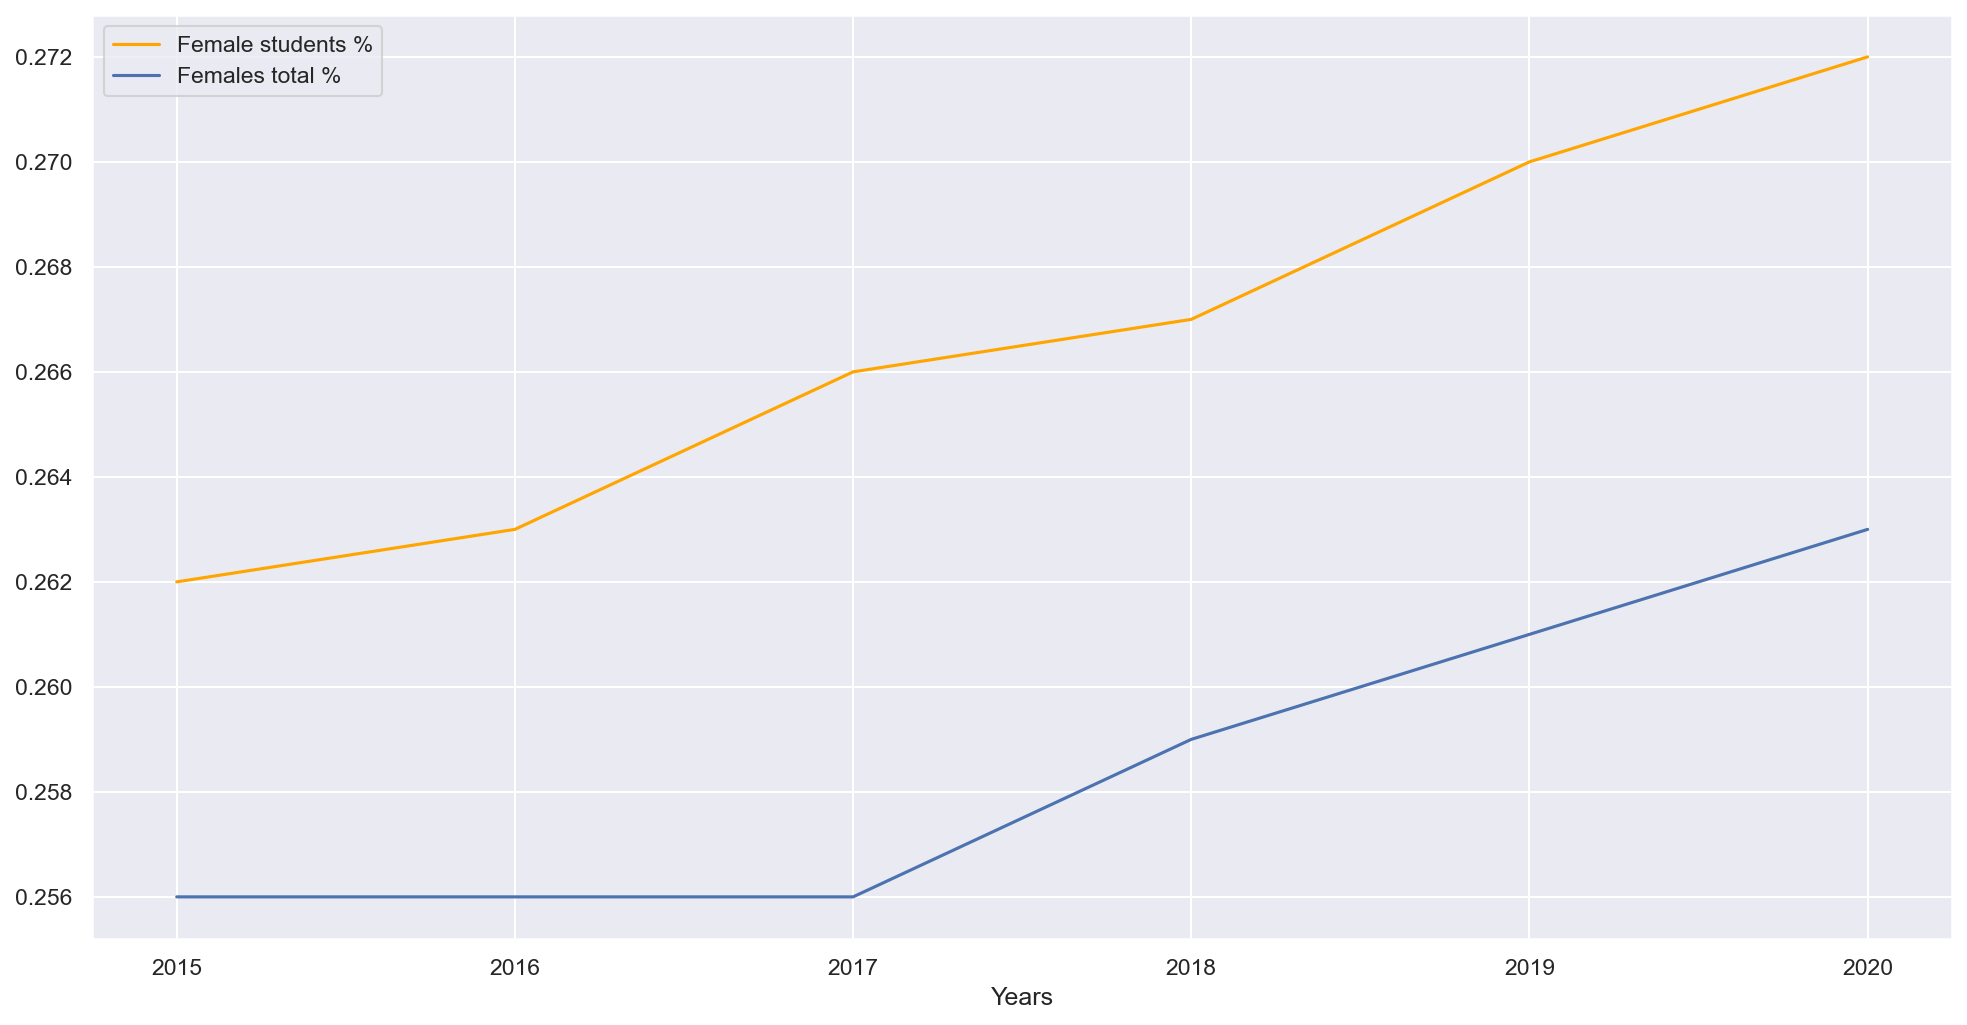

In [300]:

  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
enrolment_employment['Female students percent'].plot(label='Female students %', color='orange')
enrolment_employment['Female workforce percent'].plot(label='Females total %')

# adding title to the plot
plt.title('')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

<AxesSubplot:xlabel='Total Female workforce', ylabel='Female students total'>

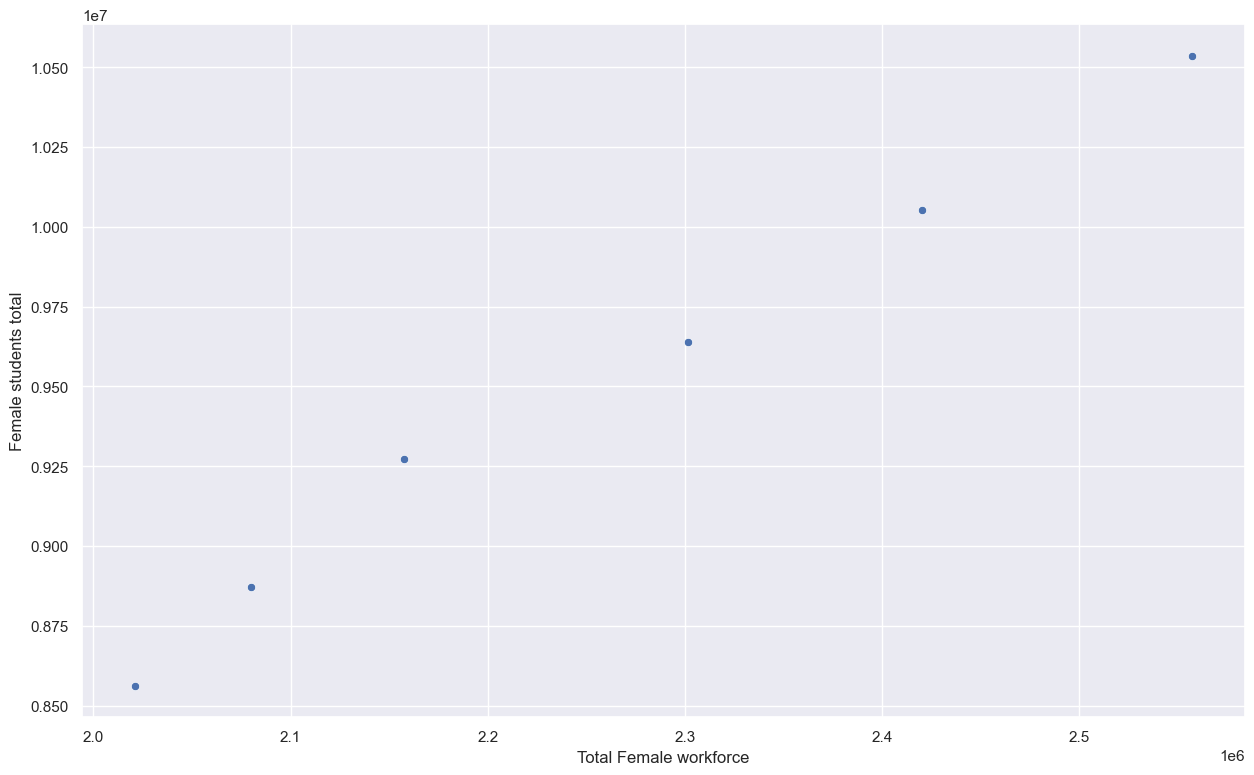

In [301]:
sns.scatterplot(x = 'Total Female workforce', y= 'Female students total', data = enrolment_employment)



<AxesSubplot:xlabel='Female students total', ylabel='Womens earnings as percentage of mens'>

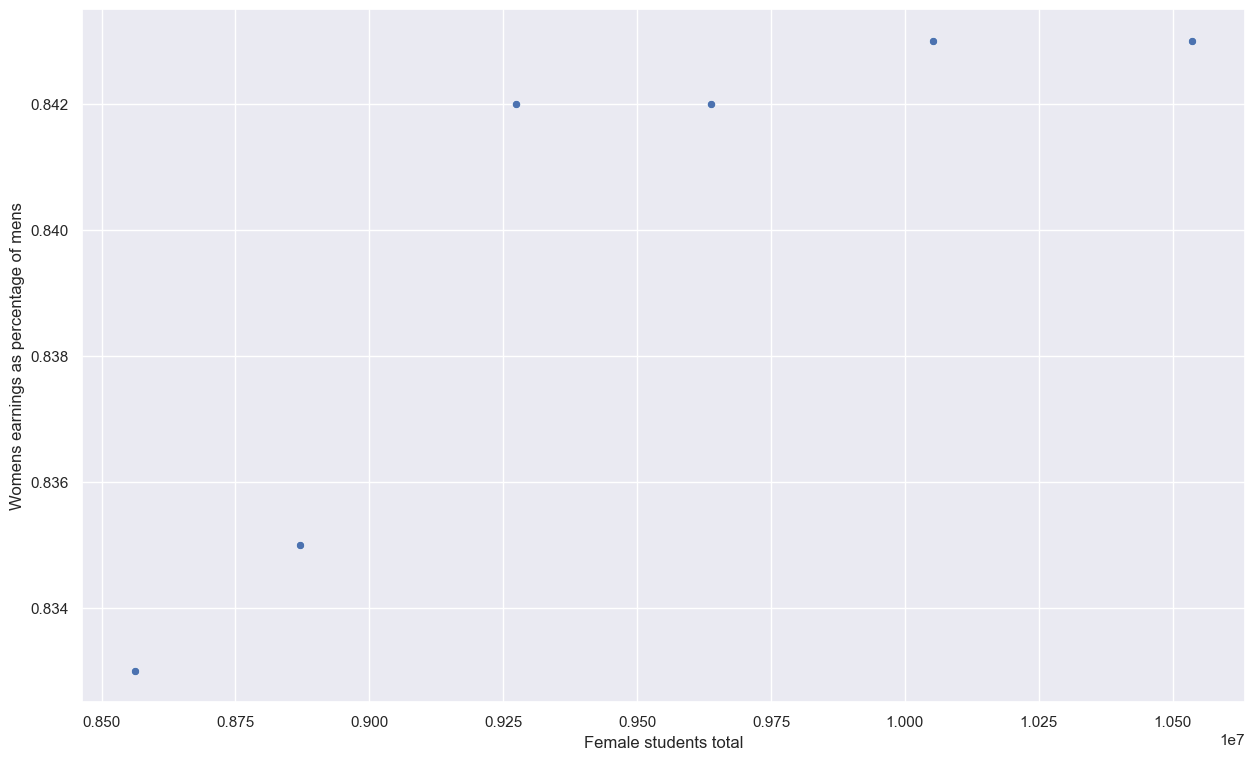

In [304]:
sns.scatterplot(x = 'Female students total', y= 'Womens earnings as percentage of mens', data = enrolment_employment)


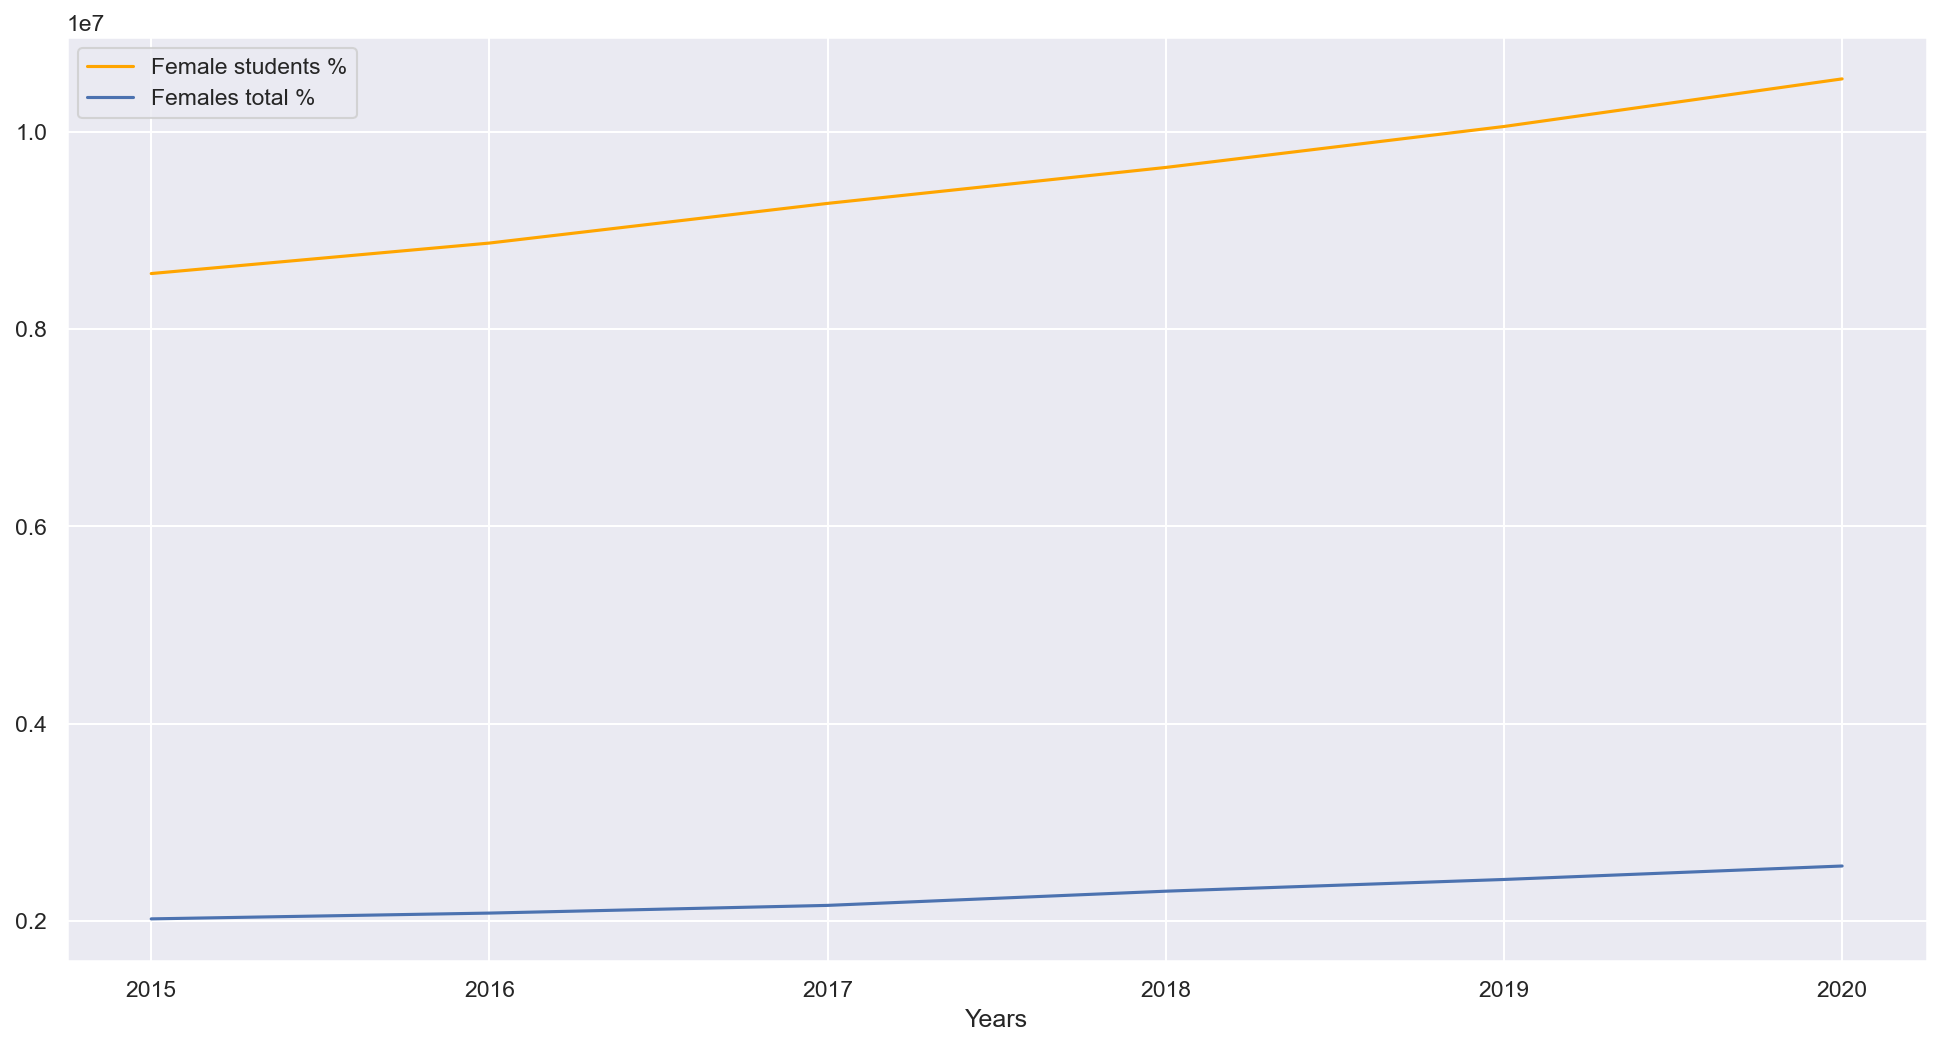

In [305]:
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
enrolment_employment['Female students total'].plot(label='Female students %', color='orange')
enrolment_employment['Total Female workforce'].plot(label='Females total %')

# adding title to the plot
plt.title('')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

In [25]:
enrolment_employment

Year STEM_occupations    Total  Male total workforce  Male workforce %  \
0  2015         All Stem  7891250               5870218             0.744   
1  2016         All Stem  8133920               6054197             0.744   
2  2017         All Stem  8427417               6269697             0.744   
3  2018         All Stem  8872203               6570508             0.741   
4  2019         All Stem  9268526               6848123             0.739   
5  2020         All Stem  9710570               7153628             0.737   

   Female total workforce  Female workforce %  Median earnings  \
0                 2021032               0.256            76583   
1                 2079723               0.256            77718   
2                 2157720               0.256            80100   
3                 2301695               0.259            81890   
4                 2420403               0.261            84021   
5                 2556942               0.263            85309   

   Male Median Earnings  Female Median Earnings  ...  Male students total  \
0                 80288                   66878  ...             13267877   
1                 81219                   67842  ...             13605954   
2                 83393                   70177  ...             14024494   
3                 84916                   71530  ...             14440302   
4                 87334                   73660  ...             14846326   
5                 89176                   75143  ...             15307579   

  Male student %  Female students total  Female student %  \
0          0.438                8562219             0.262   
1          0.438                8871392             0.263   
2          0.439                9273481             0.266   
3          0.440                9637921             0.267   
4          0.441               10052918             0.270   
5          0.441               10535634             0.272   

   Male workforce % change  Female workforce % change  \
0                      NaN                        NaN   
1                 0.031341                   0.029040   
2                 0.035595                   0.037504   
3                 0.047979                   0.066726   
4                 0.042252                   0.051574   
5                 0.044611                   0.056412   

   Male median earnings % change  Female median earnings % change  \
0                            NaN                              NaN   
1                       0.011596                         0.014414   
2                       0.026767                         0.034418   
3                       0.018263                         0.019280   
4                       0.028475                         0.029778   
5                       0.021091                         0.020133   

   Male students % change  Female students % change  
0                     NaN                       NaN  
1                0.025481                  0.036109  
2                0.030762                  0.045324  
3                0.029649                  0.039299  
4                0.028117                  0.043059  
5                0.031068                  0.048018  

[6 rows x 22 columns]

In [8]:
enrolment_employment['Male workforce % change'] = enrolment_employment['Male total'].pct_change()

In [10]:
enrolment_employment['Female workforce % change'] = enrolment_employment['Female total'].pct_change()

In [12]:
enrolment_employment['Male median earnings % change'] = enrolment_employment['Male Median Earnings'].pct_change()

In [13]:
enrolment_employment['Female median earnings % change'] = enrolment_employment['Female Median Earnings'].pct_change()

In [22]:
enrolment_employment['Male students % change'] = enrolment_employment['Male students total'].pct_change()

enrolment_employment['Female students % change'] = enrolment_employment['Female students total'].pct_change()




In [24]:
enrolment_employment = enrolment_employment.drop(columns=['womens earnings as percentage of mens: % change'])

In [18]:
enrolment_employment = enrolment_employment.rename(columns={"Male total": "Male total workforce",'Female total': 'Female total workforce',
                                      'Male total percent': 'Male workforce %', 'Female total percent':'Female workforce %',
                                       'Female students percent':'Female student %', 'Male students percent': 'Male student %'})